### This notebook implements the example on ch. 2, p.54, *Using a Perceptron to Identify Patterns*

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Perceptron
def compute_output(w, x):
    """Computes the output of a perceptron"""
    z = np.dot(w, x)
    if z < 0:
        return(-1, z)
    else:
        return(1, z)
    
def show_learning(w):
    """Print all the weights"""
    strings = ["w%d = %5.2f" % (i, x) for i,x in enumerate(w)]
    print(" , ".join(strings))
    
def make_patterns(pattern_size = (3,3)):
    """Make all the binary patterns for a grid of pixels. Pixel values are -1 and +1.
    Indicies are [pattern number, row, col]"""
    
    # Rows and columns
    rows = pattern_size[0]
    cols = pattern_size[1]

    # Construct the datasets
    pattern_size = (rows, cols)

    # Number of elements
    N = rows * cols

    # Format for binary representation with N bits
    binformat= '{:0%db}' % N

    # Number of unique patterns
    num_patterns = 2 ** N

    # Make an array of patterns
    patterns = np.zeros((num_patterns, rows, cols))
    for i in range(num_patterns):
        pattern = np.sign(np.array([int(x) for x in binformat.format(i)]) - 0.5).astype(np.float64)
        patterns[i,:,:] = np.reshape(pattern, pattern_size)
    
    # Return the patterns
    return(patterns)

def patterns2vec(patterns):
    num_patterns = patterns.shape[0]
    num_el = np.prod(patterns[0,:,:].shape)
    vectors = [np.concatenate([np.array([1]), patterns[i, :, :].flatten()]) for i in range(num_patterns)]
    return(vectors)

### Make the patterns and format into training sets

Target pattern: #8742


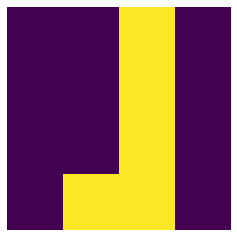

In [204]:


# Pattern size
pattern_size = (4,4)

# Make the patterns
patterns = make_patterns(pattern_size)

# Number of patterns
num_patterns = patterns.shape[0]

# Training vector from patterns
x_train = patterns2vec(patterns)

# Vector of target values
target_idx = 8742
y_train = np.zeros(num_patterns, dtype=np.float64) - 1 # Target value is -1 for all but the target pattern
y_train[target_idx] = 1.0 # Target value is +1 for the target pattern

print("Target pattern: #%d" % target_idx)
plt.matshow(patterns[target_idx, :, :])
plt.clim([-1, 1])
plt.axis("off")
plt.show()

### Train the weights

In [224]:
# Learning rate
LEARNING_RATE = 0.1

# Initialize weights according to uniform distribution centered about 0
weights = 1 * (np.random.random(size=np.prod(pattern_size)+1) - 0.5)
print("Initial Weights: ")
print(str(weights))

# Training loop
all_correct = False
idx = [x for x in range(num_patterns)]
max_epochs = 1000

epoch = 0
while all_correct is False:
    all_correct = True
    random.shuffle(idx)
    correct = 0
    incorrect = 0
    predictions = np.zeros((num_patterns))
    scores = np.zeros((num_patterns))
    
    # Inference on all the examples
    for i in idx:
        x = x_train[i]
        y = y_train[i]
        y_pred, score = compute_output(weights, x)
        predictions[i] = y_pred
        scores[i] = score
        
        # If the example is wrong, update weights
        if y_pred != y:
            weights += (y * LEARNING_RATE * x)
            all_correct = False
            incorrect += 1
        else:
            correct += 1
    
    # All the predictions
    idxMax = np.argmax(scores)
    max_score = scores[idxMax]
    
    epoch += 1
    if epoch > max_epochs:
        print("Max epochs exceeded; exiting (ran %d epochs)" % epoch)
        break
    
pct_correct = 100 * correct / num_patterns
print()
print("Ran %d epochs" % epoch)
print("%d correct, %d incorrect (%0.2f%% correct)" % (correct, incorrect, pct_correct))
print("Max score idx: " + str(idxMax))
print("Max score: " + str(max_score))
print()
print("Final weights:")
print(weights)

Initial Weights: 
[-0.155685    0.07919496 -0.27640149 -0.34410992  0.34885554 -0.26711937
  0.00689604  0.44576963  0.40052546  0.46658259 -0.17969234 -0.10340935
 -0.46192243 -0.2001415  -0.38983431  0.38111126  0.12420257]

Ran 44 epochs
65536 correct, 0 incorrect (100.00% correct)
Max score idx: 8742
Max score: 0.09286229035705396

Final weights:
[-3.255685   -0.22080504 -0.37640149  0.35589008 -0.15114446 -0.16711937
 -0.09310396  0.14576963 -0.09947454 -0.23341741 -0.27969234  0.19659065
 -0.16192243 -0.1001415   0.31016569  0.08111126 -0.37579743]


### Display the results

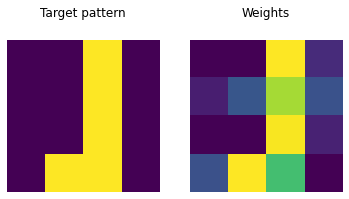

In [225]:
fig, [ax1, ax2] = plt.subplots(1,2)
clim = 0.2 * np.array([-1, 1])

# Plot the target pattern
ax1.matshow(patterns[target_idx, :, :], vmin=clim[0], vmax=clim[1])
ax1.axis("off")
ax1.set_title("Target pattern")

# Plot the weights 
weights_mat = np.reshape(weights[1:], pattern_size)
ax2.matshow(weights_mat, vmin=clim[0], vmax=clim[1])
ax2.axis("off")
ax2.set_title("Weights")
plt.show()